In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


In [59]:
df = pd.read_csv('Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [63]:
df2 = df[['airline', 'airline_sentiment', 'text']]

In [64]:
df2

,airline,airline_sentiment,text
0,Virgin America,neutral,@VirginAmerica What @dhepburn said.
1,Virgin America,positive,@VirginAmerica plus you've added commercials t...
2,Virgin America,neutral,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,negative,@VirginAmerica it's really aggressive to blast...
4,Virgin America,negative,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,American,positive,@AmericanAir thank you we got on a different f...
14636,American,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,American,neutral,@AmericanAir Please bring American Airlines to...
14638,American,negative,"@AmericanAir you have my money, you change my ..."


In [65]:
df2.dropna()

,airline,airline_sentiment,text
0,Virgin America,neutral,@VirginAmerica What @dhepburn said.
1,Virgin America,positive,@VirginAmerica plus you've added commercials t...
2,Virgin America,neutral,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,negative,@VirginAmerica it's really aggressive to blast...
4,Virgin America,negative,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,American,positive,@AmericanAir thank you we got on a different f...
14636,American,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,American,neutral,@AmericanAir Please bring American Airlines to...
14638,American,negative,"@AmericanAir you have my money, you change my ..."


Exploratory Data Analysis

In [72]:
df2['airline_sentiment'].describe()

count        14640
unique           3
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [80]:
df2['airline_sentiment'].value_counts()


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

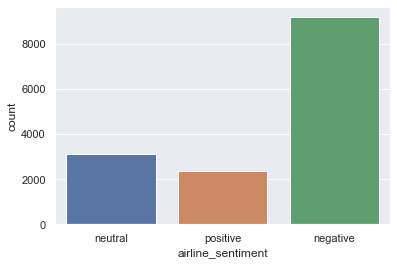

In [81]:
sns.set(style = "darkgrid")
ax = sns.countplot(x = 'airline_sentiment', data = df2)

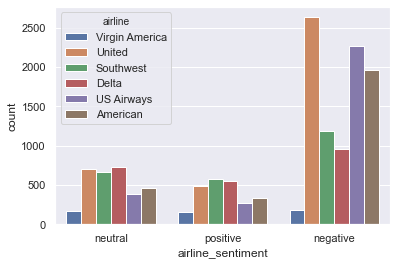

In [82]:
sns.set(style='darkgrid')
ax = sns.countplot(x = 'airline_sentiment', hue = 'airline', data = df2)

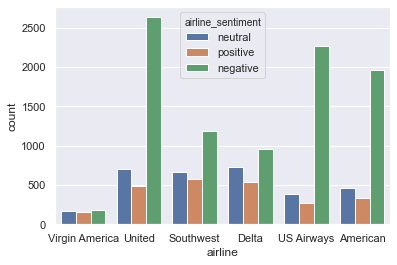

In [83]:
sns.set(style='darkgrid')
ax = sns.countplot(x = 'airline', hue = 'airline_sentiment', data = df2)

PreProcessing

In [92]:
def word_count(text):
    return(len(text.split()))

df2['word count'] = df2['text'].apply(word_count)
df2.head()

C:\Users\etc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,airline,airline_sentiment,text,word count
0,Virgin America,neutral,VirginAmerica What dhepburn said,4
1,Virgin America,positive,VirginAmerica plus youve added commercials to ...,9
2,Virgin America,neutral,VirginAmerica I didnt today Must mean I need t...,12
3,Virgin America,negative,VirginAmerica its really aggressive to blast o...,16
4,Virgin America,negative,VirginAmerica and its a really big bad thing a...,10


In [100]:
all_words = []
for line in list(df2['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        
Counter(all_words).most_common(10)

[('to', 8641),
 ('the', 6050),
 ('i', 5373),
 ('a', 4478),
 ('united', 4144),
 ('you', 4109),
 ('for', 3992),
 ('flight', 3874),
 ('on', 3778),
 ('and', 3709)]

In [102]:
stop_words = set(stopwords.words('english'))

filtered_words = []
for w in all_words:
    if w not in stop_words:
        filtered_words.append(w)

Counter(filtered_words).most_common(20)

[('united', 4144),
 ('flight', 3874),
 ('usairways', 3051),
 ('americanair', 2957),
 ('southwestair', 2453),
 ('jetblue', 2361),
 ('get', 1334),
 ('thanks', 1072),
 ('cancelled', 1056),
 ('service', 956),
 ('help', 855),
 ('time', 770),
 ('im', 764),
 ('customer', 746),
 ('us', 679),
 ('hours', 669),
 ('flights', 646),
 ('2', 643),
 ('hold', 637),
 ('plane', 618)]

Modeling and Train Test split with TF-IDF

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df2['text'])

In [121]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(df2['text'])

In [145]:
from sklearn.model_selection import train_test_split

In [169]:
#Split train and test set with TFIDF
X_train, X_test, y_train, y_test = train_test_split(text_tf, df2['airline_sentiment'], test_size=0.3, random_state=123)

In [124]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [171]:
clf = SGDClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("SGDClassifier Accuracy:", metrics.accuracy_score(y_test, predicted))

clf = LogisticRegression().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, predicted))

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Decision Tree Classifier Accuracy:", metrics.accuracy_score(y_test, predicted))

SGDClassifier Accuracy: 0.8132969034608379
Logistic Regression Accuracy: 0.8014571948998178


C:\Users\etc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Decision Tree Classifier Accuracy: 0.6801001821493625


Modeling and Train Test split without TF-IDF

In [172]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, df2['airline_sentiment'], test_size=0.3, random_state = 1)

In [173]:
clf = SGDClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("SGDClassifier Accuracy:", metrics.accuracy_score(y_test, predicted))

clf = LogisticRegression().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, predicted))

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Decision Tree Classifier Accuracy:", metrics.accuracy_score(y_test, predicted))

SGDClassifier Accuracy: 0.7647996357012751
Logistic Regression Accuracy:

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\etc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



 0.779143897996357
Decision Tree Classifier Accuracy: 0.6709927140255009


In [ ]:
# Resources
# https://python.plainenglish.io/text-analytics-for-beginners-using-python-nltk-dac7caca8aa2
# https://towardsdatascience.com/hands-on-python-data-visualization-seaborn-count-plot-90e823599012
#https://medium.com/analytics-vidhya/applying-text-classification-using-logistic-regression-a-comparison-between-bow-and-tf-idf-1f1ed1b83640